- google automatically blur out everyone's faces.
- 

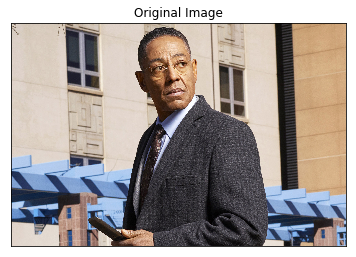

In [2]:
# read in an image to perform identity detection
# use the filter2D to blru and image
# Load in the image
import cv2
import matplotlib.pyplot as plt
image = cv2.imread('images/gus.jpg')

# Convert the image to RGB colorspace
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
# fig = plt.figure(figsize = (6,6))
plt.figure(figsize = (6,6))
plt.subplot(111)
plt.xticks([])
plt.yticks([])
plt.title('Original Image')
plt.imshow(image)
plt.show()
# ax1 = fig.add_subplot(111)
# ax1.set_xticks([])
#ax1.set_yticks([])
# ax1.set_title('Original Image')
# ax1.imshow(image)

Number of faces detected 1


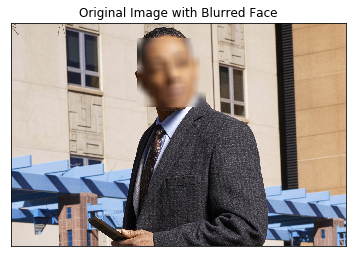

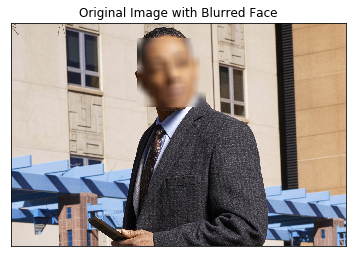

In [5]:
# make sure to adjust the parameter of the averaging blur filter to 
# completely obscure this person's identity.

## TODO: Implement face detection
import numpy as np
face_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_frontalface_default.xml')

# Load in the image
image = cv2.imread('images/gus.jpg')

# Convert the image to RGB colorspace
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

faces = face_cascade.detectMultiScale(gray, 1.5, 4)

print("Number of faces detected {0}".format(len(faces)))

## TODO: Blur the bounding box around each detected face using an averaging filter and display the result
for (x, y, w, h) in faces:
    roi = image[y:y+h, x:x+w]
    kernel = np.ones((50,50),np.float32)/2500
    face_blur = cv2.filter2D(roi,-1,kernel)
    image[y:y+h, x:x+w] = face_blur

# Display the image
fig = plt.figure(figsize = (6,6))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('Original Image with Blurred Face')
ax1.imshow(image)
plt.show()

In [6]:
# build identity protectio into your laptap camera
### Insert face detection and blurring code into the wrapper below to create an identity protector on your laptop!
import cv2
import time 

def laptop_camera_go():
    # Create instance of video capturer
    cv2.namedWindow("face detection activated")
    vc = cv2.VideoCapture(0)

    # Try to get the first frame
    if vc.isOpened(): 
        rval, frame = vc.read()
    else:
        rval = False
    
    # Keep video stream open
    while rval:
        # Plot image from camera with detections marked
        cv2.imshow("face detection activated", frame)
        
        # Exit functionality - press any key to exit laptop video
        key = cv2.waitKey(20)
        if key > 0: # Exit by pressing any key
            # Destroy windows
            cv2.destroyAllWindows()
            
            for i in range (1,5):
                cv2.waitKey(1)
            return
        
        # Read next framed
        time.sleep(0.05)             # control framerate for computation - default 20 frames per sec
        rval, frame = vc.read()    

In [7]:

# Run laptop identity hider
laptop_camera_go()